In [1]:
import numpy # linear algebra
import pandas # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3 # Database

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

import os
print(os.listdir("input"))

['database.sqlite']


In [2]:
# Connect to db
# Tables: ascent, grade, method, user
db = sqlite3.connect('input/database.sqlite')
cursor = db.cursor()

In [3]:
# Let's check what tables live in our database
sql = """SELECT name FROM sqlite_master WHERE type='table'"""
table_names = pandas.read_sql(sql,db)
print(table_names)

     name
0    user
1  method
2   grade
3  ascent


In [4]:
# And let's check out what's inside
n_rows = 5
for table_name in table_names.name:
    sql  = f"""SELECT * FROM {table_name} LIMIT {n_rows}"""
    data = pandas.read_sql(sql, db)
    print(table_name)
    print(data.columns.values)
    print()

user
['id' 'first_name' 'last_name' 'city' 'country' 'sex' 'height' 'weight'
 'started' 'competitions' 'occupation' 'sponsor1' 'sponsor2' 'sponsor3'
 'best_area' 'worst_area' 'guide_area' 'interests' 'birth' 'presentation'
 'deactivated' 'anonymous']

method
['id' 'score' 'shorthand' 'name']

grade
['id' 'score' 'fra_routes' 'fra_routes_input' 'fra_routes_selector'
 'fra_boulders' 'fra_boulders_input' 'fra_boulders_selector' 'usa_routes'
 'usa_routes_input' 'usa_routes_selector' 'usa_boulders'
 'usa_boulders_input' 'usa_boulders_selector']

ascent
['id' 'user_id' 'grade_id' 'notes' 'raw_notes' 'method_id' 'climb_type'
 'total_score' 'date' 'year' 'last_year' 'rec_date' 'project_ascent_date'
 'name' 'crag_id' 'crag' 'sector_id' 'sector' 'country' 'comment' 'rating'
 'description' 'yellow_id' 'climb_try' 'repeat' 'exclude_from_ranking'
 'user_recommended' 'chipped']



# Explore users

In [1]:
sql = """SELECT * FROM user"""
users = pandas.read_sql(sql, db)
print(users.columns.values)
print(users.head())

NameError: name 'pandas' is not defined

In [6]:
# Basic insights
users.info()
# Quite some missing information
# But about half have birth, that's interesting: who climbs hard?
# All have sex info! But integer?
# All have height and weight??
# Can check those who compete?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62593 entries, 0 to 62592
Data columns (total 22 columns):
id              62593 non-null int64
first_name      62593 non-null object
last_name       62593 non-null object
city            62593 non-null object
country         62593 non-null object
sex             62593 non-null int64
height          62593 non-null int64
weight          62593 non-null int64
started         62593 non-null int64
competitions    47942 non-null object
occupation      47946 non-null object
sponsor1        47644 non-null object
sponsor2        47633 non-null object
sponsor3        47627 non-null object
best_area       47942 non-null object
worst_area      1227 non-null object
guide_area      47942 non-null object
interests       47946 non-null object
birth           27856 non-null object
presentation    47901 non-null object
deactivated     62593 non-null int64
anonymous       62593 non-null int64
dtypes: int64(7), object(15)
memory usage: 10.5+ MB


In [7]:
users.describe()
# Quite a few spurious weights and heights
# Unit for weight and height?

,id,sex,height,weight,started,deactivated,anonymous
count,62593.000000,62593.000000,62593.000000,62593.000000,62593.000000,62593.000000,62593.0
mean,33106.406899,0.155145,83.884204,33.121899,1071.687665,0.040899,0.0
std,19373.407787,2.066462,88.155355,35.083605,999.569936,0.198058,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,16325.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,32721.000000,0.000000,0.000000,0.000000,1992.000000,0.000000,0.0
75%,49980.000000,0.000000,176.000000,68.000000,2006.000000,0.000000,0.0
max,67025.000000,255.000000,255.000000,100.000000,2090.000000,1.000000,0.0


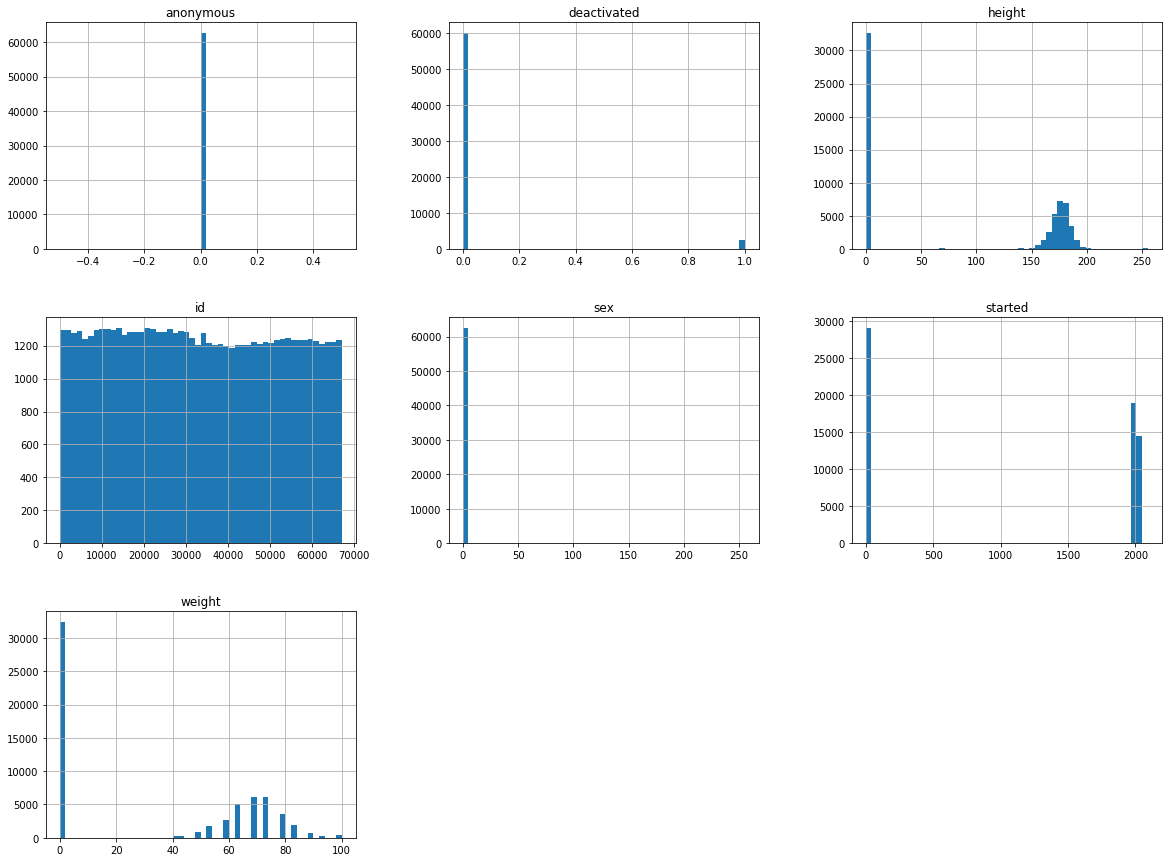

In [8]:
users.hist(bins=50, figsize=(20,15))
plt.show()

In [9]:
# Sex
users.groupby('sex')['id'].count() 
# Either seriously gender-biased or data issue

sex
0      53898
1       8691
255        4
Name: id, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fac53711a20>,
      dtype=object)

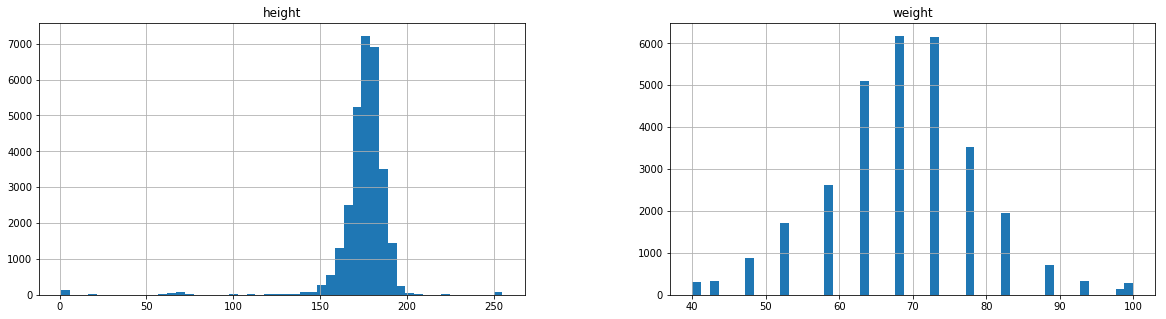

In [10]:
# Weight and height
users[['weight','height']].replace(0, numpy.nan).hist(bins=50, figsize=(20,5))
# Better now, although height still strange. Maybe unit issue? Or missed/misspelled the "1" in front?
# Height is integer, but otherwise fine (except for 100s)

Year
[1000 1900 1919 1931 1935 1936 1939 1940 1941 1943 1944 1945 1946 1947
 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961
 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
Month
[ 1  2  3  4  5  6  7  8  9 10 11 12]
Day
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


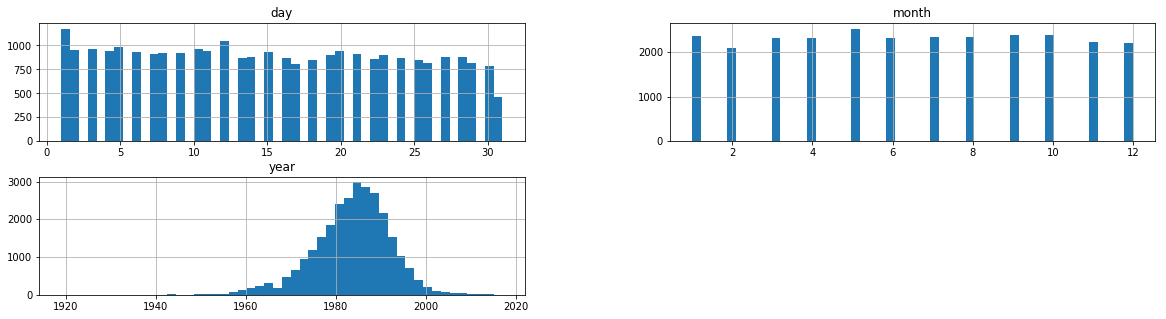

In [11]:
# Birth
birth_dates = pandas.DataFrame(users.birth.dropna().str.split("-").tolist(),
                             columns = ['year','month','day']).apply(lambda x: x.astype(int))

print('Year')
print(numpy.sort(birth_dates.year.unique()))
print('Month')
print(numpy.sort(birth_dates.month.unique()))
print('Day')
print(numpy.sort(birth_dates.day.unique()))

# Year is weird, let's take at least 1000 and 1900 out
birth_dates = birth_dates[birth_dates.year > 1900]
birth_dates.hist(bins=50, figsize=(20,5))
plt.show()

In [23]:
# Where are they from?
users.groupby('country')['id'].count().sort_values(ascending=False).head(10)
# Mainly US, but also other countries

country
USA    11861
ESP     6905
DEU     3712
SWE     3629
ITA     3590
FRA     3326
POL     3303
GBR     2660
BRA     2062
AUT     1928
Name: id, dtype: int64

Object `sort_values()` not found.
